In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

In [13]:
import numpy as np
import warnings
from scipy.optimize import minimize
from scipy import stats
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from branching_process.util import plots

In [23]:
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, fit, model
sim = reload(sim)
influence = reload(influence)
fit = reload(fit)
model = reload(model)

Automatic pdb calling has been turned ON
umk [[ 1.41421356]] 0.5870506526949596


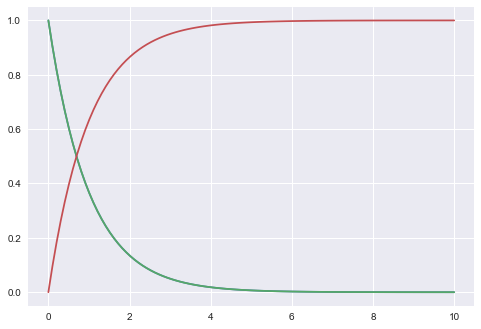

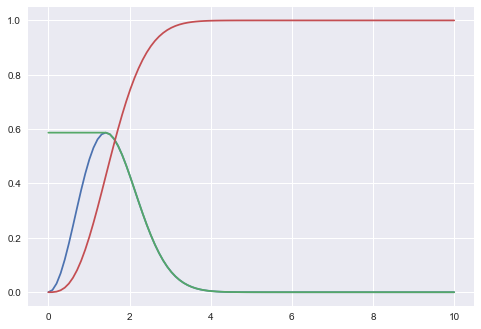

In [64]:
%pdb on
influence = reload(influence)
exp_phi = influence.ExpKernel()
causal_phi = influence.MaxwellKernel()
evalpts = np.linspace(0, 10, 100)
tau=1

plt.figure();
plt.plot(evalpts, exp_phi(evalpts, tau=tau));
plt.plot(evalpts, exp_phi.majorant(evalpts, tau=tau));
plt.plot(evalpts, exp_phi.integrate(evalpts, tau=tau));

plt.figure();
plt.plot(evalpts, causal_phi(evalpts, tau=tau));
plt.plot(evalpts, causal_phi.majorant(evalpts, tau=tau));
plt.plot(evalpts, causal_phi.integrate(evalpts, tau=tau));


In [67]:
exp_phi(evalpts, tau=[1,2,3]).shape

(3, 100)

ValueError: x and y must have same first dimension, but have shapes (100,) and (3, 100)

> /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_base.py(244)_xy_from_xy()
    242         if x.shape[0] != y.shape[0]:
    243             raise ValueError("x and y must have same first dimension, but "
--> 244                              "have shapes {} and {}".format(x.shape, y.shape))
    245         if x.ndim > 2 or y.ndim > 2:
    246             raise ValueError("x and y can be no greater than 2-D, but have "

ipdb> q


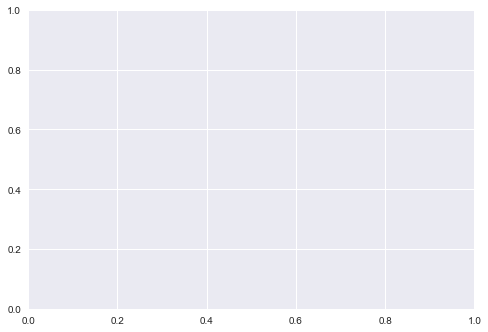

In [66]:
influence = reload(influence)
exp_phi = influence.ExpKernel()
causal_phi = influence.MaxwellKernel()
evalpts = np.linspace(0, 10, 100)
tau=np.array([1,2,3]).reshape(1,-1)

plt.figure();
plt.plot(evalpts, exp_phi(evalpts, tau=tau));
plt.plot(evalpts, exp_phi.majorant(evalpts, tau=tau));
plt.plot(evalpts, exp_phi.integrate(evalpts, tau=tau));

plt.figure();
plt.plot(evalpts, causal_phi(evalpts, tau=tau));
plt.plot(evalpts, causal_phi.majorant(evalpts, tau=tau));
plt.plot(evalpts, causal_phi.integrate(evalpts, tau=tau));


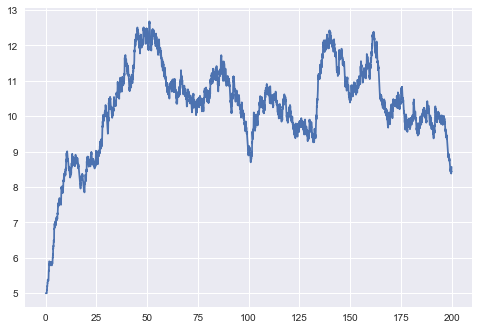

In [32]:
import numpy.random
numpy.random.seed(1238)

fixed_exp_phi = influence.FixedKernel(
    influence.ExpKernel(),
    tau=5
)

param_exp = dict(
    phi=fixed_exp_phi,
    mu=5.0,
    eta=0.5,
    start=0.0,
    end=200)

sim = reload(sim)
timestamps = np.sort(sim.sim_hawkes(**param_exp));
evalpts = np.linspace(param_exp['start'], param_exp['end'], 5000)

true_intensity = model.intensity_hawkes(timestamps, eval_timestamps=evalpts, **param_exp)
plt.plot(evalpts, true_intensity);

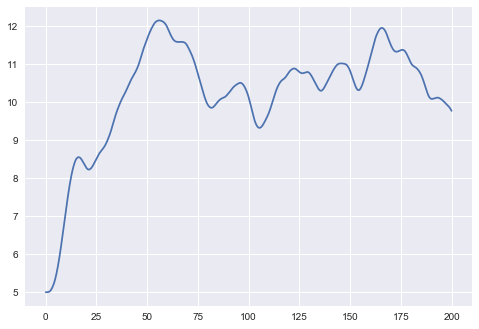

In [6]:
import numpy.random
numpy.random.seed(1238)
param_causal = dict(
    phi=causal_phi,
    mu=5.0,
    eta=0.5,
    start=0.0,
    end=200)

sim = reload(sim)
timestamps = np.sort(sim.sim_hawkes(**param_causal));
evalpts = np.linspace(param_causal['start'], param_causal['end'], 5000)

true_intensity = model.intensity_hawkes(timestamps, eval_timestamps=evalpts, **param_causal)
plt.plot(evalpts, true_intensity);